In [671]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import scipy as sp


In [672]:
lmbda = 0.8
n = 100
xmin = 77
xmax = 78
a = 95
b = 5

def arrived(x, y):
    if x >= xmin and x <= xmax and y >= xmin and y <= xmax:
        return True
    return False

danger_zones = [
    ([46,60], 4, 40),
    ([20,20], 80, 2),
    ([73,68], 10, 8),
    ([71,72], 2, 10),
    ([83,72], 2, 10),
    ([42,48], 16, 4)
]


def danger(x, y):
    for danger_zone in danger_zones:
        xinit = danger_zone[0][0] 
        yinit = danger_zone[0][1]
        if x >= xinit and x <= xinit + danger_zone[1] - 1 and y >= yinit and y <= yinit + danger_zone[2] - 1: 
            return True
    return False

def p_up(x, y):
    prob_vector = np.zeros([n, n])
    if arrived(x, y):
        prob_vector[x, y] = 1
    elif y < n - 2 and x > 0: 
        prob_vector[x, y + 1] = 0.3
        prob_vector[x, y + 2] = 0.4
        prob_vector[x - 1, y + 2] = 0.2
        prob_vector[x - 1, y + 1] = 0.1 
    elif x > 0 and y == n - 2:
        prob_vector[x, y + 1] = 0.7
        prob_vector[x - 1, y + 1] = 0.3
    elif x > 0 and y == n - 1:
        prob_vector[x, y] = 0.7
        prob_vector[x - 1, y] = 0.3
    elif x == 0 and y == n - 2:
        prob_vector[x, y + 1] = 1
    elif x == 0 and y < n - 2:
        prob_vector[x, y + 1] = 0.4
        prob_vector[x, y + 2] = 0.6
    elif x == 0 and y == n - 1: 
        prob_vector[x, y] = 1 
    return  np.reshape(prob_vector, [1, n*n]) 


def p_down(x, y):
    prob_vector = np.zeros([n, n])
    if arrived(x, y):
        prob_vector[x, y] = 1
    elif y > 0 and x > 0: 
        prob_vector[x, y] = 0.3
        prob_vector[x, y - 1] = 0.3
        prob_vector[x - 1, y] = 0.2
        prob_vector[x - 1, y - 1] = 0.2 
    elif y == 0 and x > 0:
        prob_vector[x, y] = 0.6
        prob_vector[x - 1, y] = 0.4
    elif x == 0 and y > 0:
        prob_vector[x, y] = 0.5
        prob_vector[x, y - 1] = 0.5
    elif x == 0 and y == 0:
        prob_vector[x, y] = 1
    return  np.reshape(prob_vector, [1, n*n])

def p_left(x, y):
    prob_vector = np.zeros([n, n])
    if arrived(x, y):
        prob_vector[x, y] = 1
    elif y < n - 1 and x > 1: 
        prob_vector[x - 1, y + 1] = 0.3
        prob_vector[x - 1, y] = 0.2
        prob_vector[x - 2, y] = 0.3
        prob_vector[x - 2, y + 1] = 0.2
    elif y < n - 1 and x == 1:
        prob_vector[x - 1, y + 1] = 0.5
        prob_vector[x - 1, y] = 0.5
    elif y < n - 1 and x == 0:
        prob_vector[x, y + 1] = 0.5
        prob_vector[x, y] = 0.5
    elif y == n - 1 and x > 1:
        prob_vector[x - 1, y] = 0.5
        prob_vector[x - 2, y] = 0.5
    elif y == n - 1 and x == 1:
        prob_vector[x - 1, y] = 1
    elif y == n - 1 and x == 0:
        prob_vector[x, y] = 1
    return  np.reshape(prob_vector, [1, n*n])

def p_right(x, y):
    prob_vector = np.zeros([n, n])
    if arrived(x, y):
        prob_vector[x, y] = 1
    elif y < n - 1 and x < n - 1: 
        prob_vector[x + 1, y] = 0.3
        prob_vector[x + 1, y + 1] = 0.4
        prob_vector[x, y] = 0.2
        prob_vector[x, y + 1] = 0.1 
    elif y == n - 1 and x < n - 1:
        prob_vector[x + 1, y] = 0.7
        prob_vector[x, y] = 0.3
    elif x == n - 1 and y < n - 1:
        prob_vector[x, y] = 0.5
        prob_vector[x, y + 1] = 0.5 
    elif x == n - 1 and y == n - 1:
        prob_vector[x, y] = 1
    return  np.reshape(prob_vector, [1, n*n])

def p(a, x, y):
    if a == 'U':
        return p_up(x, y)
    elif a == 'D':
        return p_down(x, y)
    elif a == 'L':
        return p_left(x, y)
    elif a == 'R':
        return p_right(x, y)


def get_p_matrix(d):
    p_matrix = np.zeros([n*n, n*n])
    for i in range(len(d)):
        a = d[i]
        x = i // n
        y = i % n
        p_matrix[i,:] = p(a, x, y)
    return p_matrix

def rvalue(i):
    x = i // n
    y = i % n
    if arrived(x, y):
        return 1
    elif danger(x, y):
        return -5
    else: 
        return 0

r = np.zeros(n*n)
for i in range(n*n):
    r[i] = rvalue(i)


In [673]:
import time
decisions = ['D', 'L', 'R']

def getsum(i, a, v):
    x = i // n
    y = i % n
    sum = 0
    prob_vector = p(a, x, y)
    #for j in range(n*n):
    #    sum += prob_vector[0,j]*v[j]
    
    for r in range(max(x - 2, 0), min(x + 2, n)):
        for q in range(max(y - 1, 0), min(y + 3, n)):
            k = r*n + q
            sum += prob_vector[0,k]*v[k]

    return sum 


def policy_iteration():
    d = ['R']*(n*n) 
    j = 0
    t = 0
    v = np.zeros(n*n)
    while True and j < 150:
        p_matrix = get_p_matrix(d)
        mat = np.eye(n*n) - lmbda*p_matrix
        t0 = time.time()
        # v = np.linalg.pinv(mat)@r
        v_test = v
        v = np.array(sp.sparse.linalg.spsolve(sp.sparse.csc_matrix(mat),r))
        if abs(sum(v) - sum(v_test)) < 1e-10:
            break
        t1= time.time()
        t += t1-t0
        
        dnext = d.copy()
        for i in range(n*n):
            maxa = 'U'
            maxval = r[i] + lmbda*getsum(i, 'U', v)
            for a in decisions:
                tryval = r[i] + lmbda*getsum(i, a, v)
                if tryval > maxval:
                    maxval = tryval
                    maxa = a
            dnext[i] = maxa
        print(j)
        dtable = pd.DataFrame(np.reshape(np.array(d), [n,n]).T)
        dtable.reindex(index=dtable.index[::-1]).to_csv('dtable' + str(j) + '.csv')
        print('v = ' + str(sum(v)))
        if d == dnext:
            break
        
        d = dnext
        j+=1
    return d, j, t

In [674]:
test = policy_iteration()

policy = pd.DataFrame(np.reshape(np.array(test[0]), [n,n]).T)


0
v = -12866.524432894399
1
v = -3887.1977898919754
2
v = -3378.1418815700154
3
v = -3294.5657947490595
4
v = -3288.31124888592
5
v = -3284.4789884334264
6
v = -3277.917472376957
7
v = -3267.506804651976
8
v = -3264.658079183587
9
v = -3262.6014960248267
10
v = -3261.195937618847
11
v = -3260.2896371630377
12
v = -3259.7338151401295
13
v = -3259.3990279166
14
v = -3259.1973038802093
15
v = -3259.0754425870873
16
v = -3259.0015377047125
17
v = -3258.956547766507
18
v = -3258.9290172009137
19
v = -3258.9120525364833
20
v = -3258.9005181326165
21
v = -3258.8933956248993
22
v = -3258.8919782993667
23
v = -3258.891754338587
24
v = -3258.891562151287
25
v = -3258.8914905137735
26
v = -3258.8914501521913
27
v = -3258.8913948867803
28
v = -3258.8913880381997
29
v = -3258.891383093209
30
v = -3258.891379388576
31
v = -3258.891376673365
32
v = -3258.891374703876
33
v = -3258.8913732898627
34
v = -3258.891372260525
35
v = -3258.891371534746
36
v = -3258.891371042727
37
v = -3258.891370657964
38
v

In [675]:
policy = pd.DataFrame(np.reshape(np.array(test[0]), [n,n]).T)
policy.reindex(index=policy.index[::-1]).to_csv('policy.csv')

In [676]:
policy
policy.reindex(index=policy.index[::-1]).to_csv('policy.csv')

In [677]:
test[1], test[2]

(62, 32.21255922317505)

In [678]:
import random

simulate_policy = np.reshape(test[0], [n,n])

def simulate(x_0, y_0, simulate_policy, maxN=1000):
    x = []
    y = []
    x_n = x_0
    y_n = y_0
    for i in range(maxN):
        a = simulate_policy[x_n, y_n]
        p_vector = p(a, x_n, y_n)      
        i = random.choices(list(range(n*n)),  weights=p_vector[0,:], k=1)[0]
        x_n = i // n
        y_n = i % n
        x.append(x_n)
        y.append(y_n)
        if arrived(x_n, y_n):
            break
    return x, y

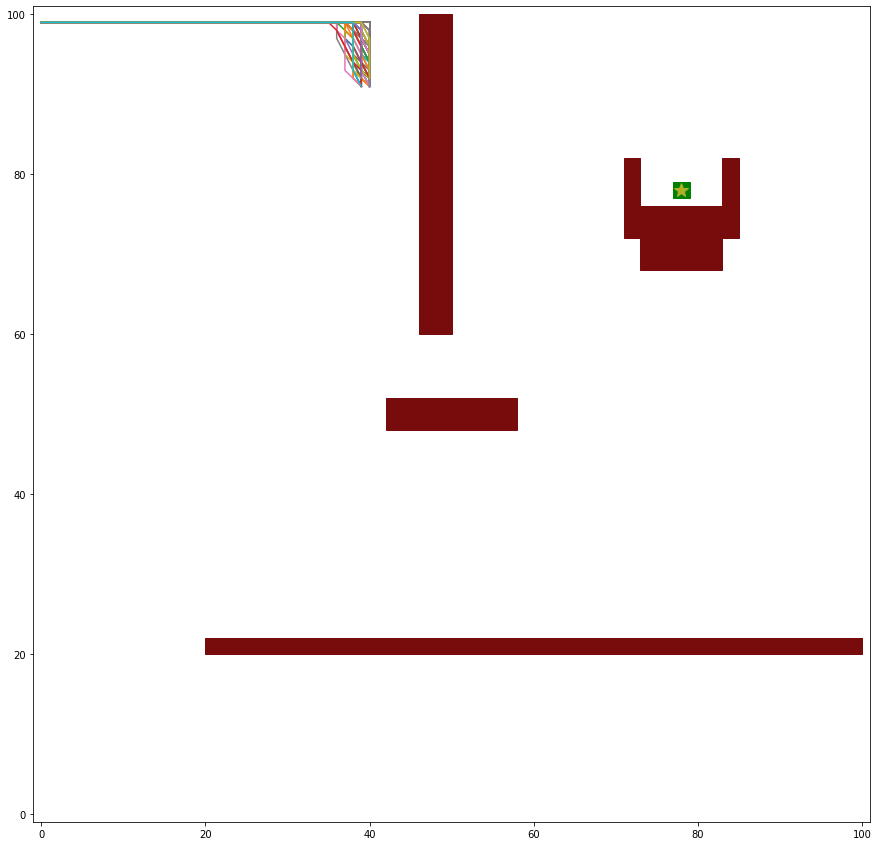

In [679]:
c1 = '#3c84e8'

fig,ax = plt.subplots()
a = 40
b = 90

ax.set_xlim([-1,n + 1])
ax.set_ylim([-1,n + 1])

plt.plot([xmin + 1], [xmin + 1], marker='*', markersize=15, color='#aeb02a')

ax.add_patch(plt.Rectangle([xmin,xmin], xmax - xmin + 1, xmax - xmin + 1, color='green'))
for danger_zone in danger_zones:
    ax.add_patch(plt.Rectangle(*danger_zone, color='#780c0c'))

for i in range(100):
    plt.plot(*simulate(a, b, simulate_policy))

fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()


# Programación Lineal   

In [699]:
import numpy as np
import cvxpy as cp

n = 100
lmbda = 0.9
decisions = [ 'U', 'D', 'L', 'R']
def get_linear_p_matrix():
    p_matrix = np.zeros([n*n*4, n*n])
    for i in range(n*n):
        x = i // n
        y = i % n
        for j in range(4):
            p_matrix[i + j*n*n, :] = -lmbda*p(decisions[j], x, y)
            p_matrix[i + j*n*n, i] += 1
    return sp.sparse.csc_matrix(p_matrix)

def get_r_vector():
    r_vector = np.zeros(n*n*4)
    for i in range(n*n):
        for j in range(4):
            r_vector[i + j*n*n] = rvalue(i)
    return r_vector

def initial_distribution():
    alpha = np.zeros(n*n)
    c = 1
    for i in range(n*n):
         alpha[i] = c
    alpha[2] = 1
    return alpha

P = get_linear_p_matrix().T
r = get_r_vector()
alpha = initial_distribution()

x = cp.Variable(n*n*4)
prob = cp.Problem(cp.Maximize(cp.matmul(r.T,x)), [cp.matmul(P, x) == alpha, x>=0])
prob.solve(verbose=True, solver='ECOS_BB')



                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Nov 01 09:48:58 AM: Your problem has 40000 variables, 2 constraints, and 0 parameters.
(CVXPY) Nov 01 09:48:58 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 01 09:48:58 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 01 09:48:58 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 01 09:48:58 AM: Compiling problem (target solver=ECOS_BB).
(CVXPY) Nov 01 09:48:58 AM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -

-2292.7139654047187

In [700]:
values = x.value

In [701]:
values

array([6.79267525e-01, 9.78307283e-01, 1.26375622e+00, ...,
       8.56258525e-09, 9.99009987e-09, 1.69266462e-08])

In [702]:
def get_policy_from_values(values):
    policy = np.zeros([n, n, 4])
    for i in range(n*n):
        suma = sum([values[j*n*n + i] for j in range(4)])
        for j in range(4):
            x = i // n
            y = i % n
            policy[x, y, j] = values[j*n*n + i] / suma
    return policy

get_policy_from_values(values)

array([[[6.02351540e-01, 8.11429615e-03, 1.06236936e-02, 3.78910471e-01],
        [6.45302512e-01, 4.32089132e-02, 9.89896777e-03, 3.01589607e-01],
        [5.73969018e-01, 3.42586442e-02, 9.97866221e-03, 3.81793676e-01],
        ...,
        [1.04776658e-01, 4.41881274e-01, 1.63820402e-01, 2.89521666e-01],
        [1.26138234e-01, 4.58407034e-01, 1.62410868e-01, 2.53043865e-01],
        [1.73574410e-01, 3.36831125e-01, 1.73574410e-01, 3.16020056e-01]],

       [[5.63347256e-01, 3.85193284e-03, 7.03021342e-03, 4.25770598e-01],
        [5.00786284e-01, 4.40421110e-03, 7.66774095e-03, 4.87141764e-01],
        [4.61521669e-01, 2.66125199e-03, 8.67617228e-03, 5.27140907e-01],
        ...,
        [1.33001440e-01, 3.74866627e-01, 1.48392167e-01, 3.43739766e-01],
        [1.49231930e-01, 3.98218456e-01, 1.51290469e-01, 3.01259144e-01],
        [1.76979513e-01, 3.07714333e-01, 1.29091742e-01, 3.86214412e-01]],

       [[2.73692667e-01, 2.61290848e-03, 2.22682208e-03, 7.21467603e-01],
        

In [703]:
test_lp = get_policy_from_values(values)

d = []
for i in range(n):
    for j in range(n):
        maxa = decisions[0]
        maxval = test_lp[i, j, 0]
        for f in range(1,4):
            val = test_lp[i, j, f]
            if val > maxval:
                maxval = val
                maxa = decisions[f]
        d.append(maxa)


d = np.reshape(np.array(d), [n,n])
test_lp = pd.DataFrame(d.T)
test_lp.reindex(index=test_lp.index[::-1]).to_csv('test.csv')


In [704]:
import random

simulate_policy = get_policy_from_values(values)


def simulate_randomized(x_0, y_0, maxN=1000):
    x = []
    y = []
    x_n = x_0
    y_n = y_0
    for i in range(maxN):
        a = random.choices(decisions, weights=simulate_policy[x_n, y_n,:])[0]
        p_vector = p(a, x_n, y_n)      
        i = random.choices(list(range(n*n)),  weights=p_vector[0,:], k=1)[0]
        x_n = i // n
        y_n = i % n
        x.append(x_n)
        y.append(y_n)
        if arrived(x_n, y_n):
            break
    return x, y

def simulate(x_0, y_0, simulate_policy, maxN=1000):
    x = []
    y = []
    x_n = x_0
    y_n = y_0
    for i in range(maxN):
        a = simulate_policy[x_n, y_n]
        p_vector = p(a, x_n, y_n)      
        i = random.choices(list(range(n*n)),  weights=p_vector[0,:], k=1)[0]
        x_n = i // n
        y_n = i % n
        x.append(x_n)
        y.append(y_n)
        if arrived(x_n, y_n):
            break
    return x, y

In [705]:
simulate_policy[40, 90]

array([0.20039861, 0.3056578 , 0.23357014, 0.26037345])

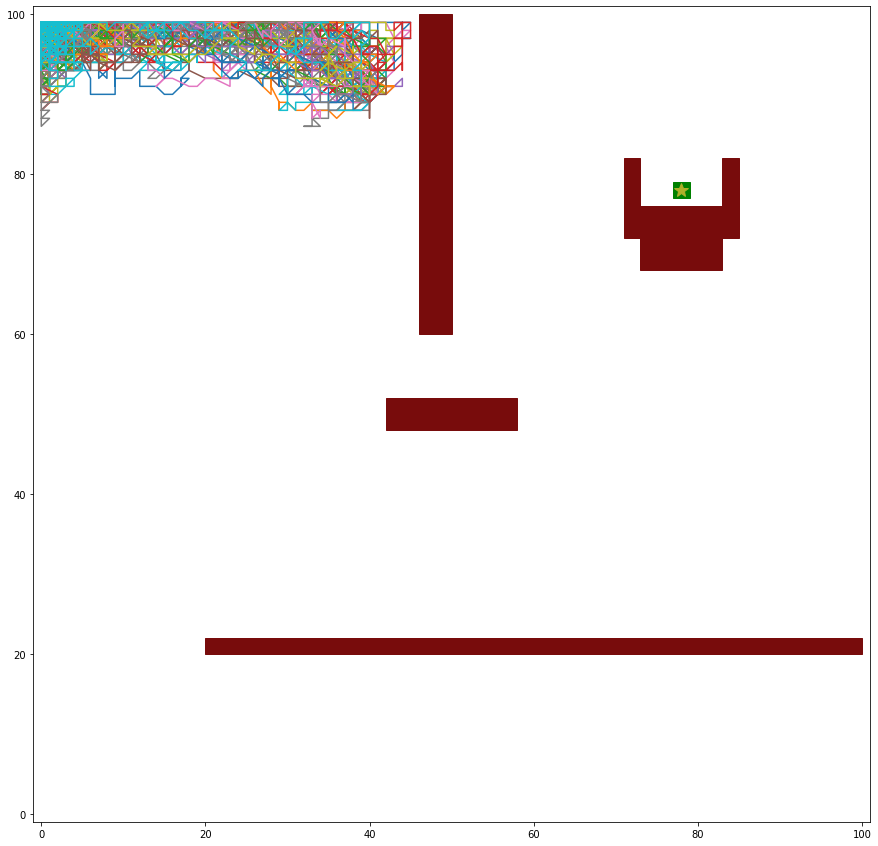

In [706]:
c1 = '#3c84e8'

fig,ax = plt.subplots()

a = 40
b = 90

ax.set_xlim([-1, n + 1])
ax.set_ylim([-1, n + 1])



plt.plot([(xmin + xmax + 1)/2], [(xmin + xmax + 1)/2], marker='*', markersize=15, color='#aeb02a')

ax.add_patch(plt.Rectangle([xmin,xmin], xmax - xmin + 1, xmax - xmin + 1, color='green'))
for danger_zone in danger_zones:
    ax.add_patch(plt.Rectangle(*danger_zone, color='#780c0c'))

for i in range(100):
    plt.plot(*simulate_randomized(a, b))

fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()


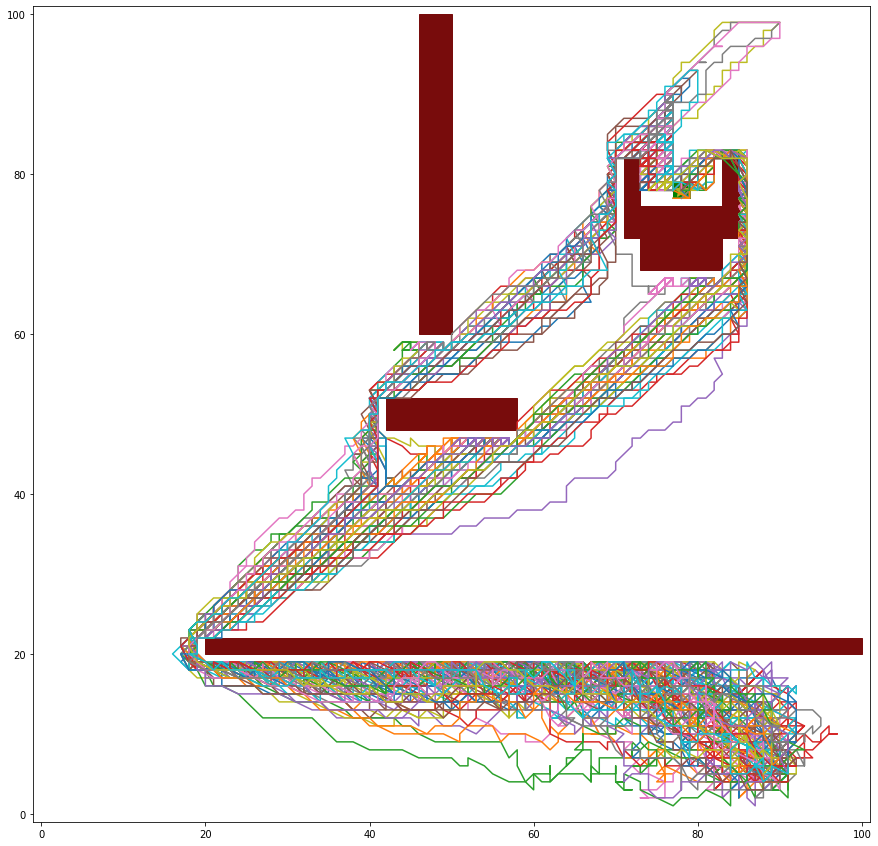

In [707]:
c1 = '#3c84e8'

fig,ax = plt.subplots()

a = 90
b = 5

ax.set_xlim([-1, n + 1])
ax.set_ylim([-1, n + 1])



plt.plot([(xmin + xmax + 1)/2], [(xmin + xmax + 1)/2], marker='*', markersize=15, color='#aeb02a')

ax.add_patch(plt.Rectangle([xmin,xmin], xmax - xmin + 1, xmax - xmin + 1, color='green'))
for danger_zone in danger_zones:
    ax.add_patch(plt.Rectangle(*danger_zone, color='#780c0c'))

for i in range(100):
    plt.plot(*simulate_randomized(a, b))

fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()